Gradient decenet method is a first order optimization algorithm used to find the maximum or minimum of a function. This method is a key foundation and commonly used in machine learning and deep learning techniques. 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

df=pd.read_csv('..//data/Advertising.csv')

X=df[['TV', 'radio', 'newspaper']]
Y=df['sales'].values
X=X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)


The first step of 'Gradient descent algorithm" is to define the starting points. In this tutorial, the starting points are defined randomly. 

In [2]:
import random
import math
import numpy as np

def initialize(dim):
    random.seed(42)
    b=random.random()
    a=np.random.rand(dim)
    return b,a

Step 2 predicts the value of y using the parameters and compute the cost. 

In [3]:
def predict_Y(b,a,X):
    return b + np.dot(X,a)

def get_cost(Y,Y_hat):
    Y_resd=Y-Y_hat
    return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y-Y_resd)

Step 3 computes the gradient which measures the change in all weights with regard to the change in error and update the parameters. 

In [4]:

def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
    db=(np.sum(y_hat-y)*2)/len(y)
    dw=(np.dot((y_hat-y),x)*2)/len(y)
    b_1=b_0-learning_rate*db
    theta_1=theta_o-learning_rate*dw
    return b_1,theta_1

Repeat Step 2 and step 3 till the changes in cost function values become very small or for the number of pre-defined iterations.

In [5]:
def run_gradient_descent(X,Y,alpha,num_iterations):
    tolerance = 1e-06
    b,theta=initialize(X.shape[1])
    w_list = ['weight_a' + str(d+1)for d in range(0,X.shape[1])]
    gd_iterations_df=pd.DataFrame(columns=['iteration','value_b'] +w_list +  ['cost'])
    result_idx=0
    prev_cost = 0
    for iter_num in range(num_iterations):
        Y_hat=predict_Y(b,theta,X)
        print(b)
        this_cost=get_cost(Y,Y_hat)
        prev_b=b
        prev_theta=theta
        b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)
        gd_iterations_df.loc[result_idx]=[iter_num,b] + theta.tolist() +[ this_cost]
        result_idx=result_idx+1   
        if (np.abs(this_cost - prev_cost)<=tolerance):
            break
        prev_cost = this_cost
       
    return gd_iterations_df,b,theta
        
gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha=0.01,num_iterations=400)

0.6394267984578837
0.9070882624887261
1.1693964972389517
1.4264585672941728
1.6783793959482893
1.9252618080293236
2.167206571868737
2.4043124404313625
2.636676191622735
2.8643926677902805
3.087554814434475
3.3062537181457854
3.5205786437828697
3.730617070907212
3.936454729489068
4.138175634899286
4.3358621222013
4.5295948797572745
4.719452982162129
4.905513922518886
5.087853644068509
5.266546571187138
5.441665639763396
5.613282326968128
5.781466680428766
5.94628734682019
6.107811599883786
6.2661053678861105
6.421233260528388
6.57325859531782
6.722243423411464
6.868248554943235
7.01133358384437
7.151556912167482
7.2889757739241325
7.4236462584456495
7.555623333276737
7.684960866611202
7.811711649278978
7.935927416293398
8.05765886796753
8.17695569060818
8.293866576796017
8.408439245260096
8.520720460354894
8.630756051147797
8.738590930124841
8.844269111522344
8.947833729291897
9.04932705470606
9.148790513611939
9.2462647033397
9.341789409272906
9.435403621087447
9.527145548665699
9.6170

Demonstrate how the cost changes based on the parameters. 

[]

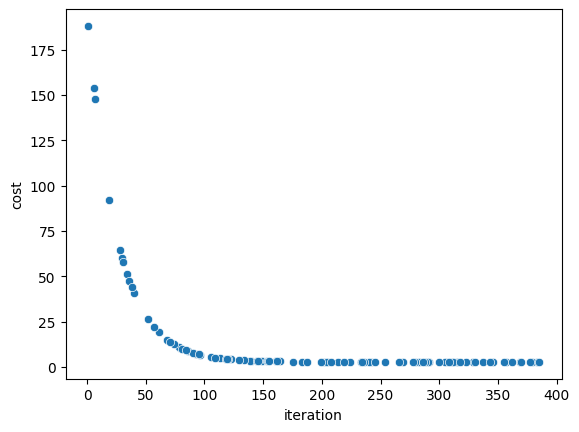

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(gd_iterations_df.sample(100), x = 'iteration', y = 'cost')
plt.plot()